In [1]:
import pandas as pd, numpy as np 

In [2]:
data = pd.read_csv('archive/chicago_taxi_trips_2016_11.csv') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295000 entries, 0 to 1294999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1294453 non-null  float64
 1   trip_start_timestamp    1295000 non-null  object 
 2   trip_end_timestamp      1294850 non-null  object 
 3   trip_seconds            1294564 non-null  float64
 4   trip_miles              1294987 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    826575 non-null   float64
 7   pickup_community_area   1176867 non-null  float64
 8   dropoff_community_area  1149193 non-null  float64
 9   fare                    1294983 non-null  float64
 10  tips                    1294983 non-null  float64
 11  tolls                   1294983 non-null  float64
 12  extras                  1294983 non-null  float64
 13  trip_total              1294983 non-null  float64
 14  pa

In [3]:
clean_data = data[['pickup_community_area', 'dropoff_community_area', 'trip_seconds']].dropna()
clean_data = clean_data[clean_data.trip_seconds>300.0]

In [4]:
clean_data.iloc[0]

pickup_community_area      33.0
dropoff_community_area     28.0
trip_seconds              840.0
Name: 0, dtype: float64

In [5]:
arr = [] 
# for i in range(1, int(clean_data['pickup_community_area'].nunique())+1): 
for i in range(7, 10): 
    temp = [] 
#     for j in range(1, int(clean_data['dropoff_community_area'].nunique())+1): 
    for j in range(1, 4): 
        x = clean_data.loc[(clean_data['pickup_community_area']==i) & (clean_data['dropoff_community_area']==j)]['trip_seconds'].mean()
        temp.append(x)
    arr.append(temp) 
arr = np.array(arr) 


In [6]:
df = pd.DataFrame(arr).fillna(0)

In [7]:
df

,0,1,2
0,1236.523490,1507.100840,860.627586
1,1348.072271,1951.742782,925.450662
2,0.000000,900.000000,0.000000


In [8]:
import networkx as nx
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

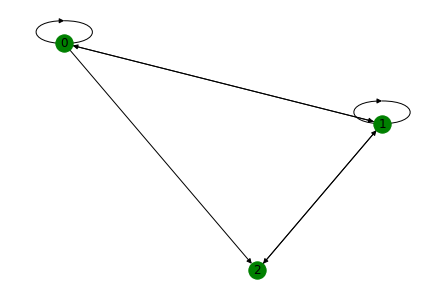

In [9]:
nx.draw(G, with_labels=True, node_color ='green') 

# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)